# Bank Churn Dataset Analysis.

# Dependencies

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from sklearn.metrics import confusion_matrix, classification_report

# Dataset.

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

In [3]:
# Load the dataset
df = pd.read_csv(r'c://Users/HaaHa/Downloads/Springboard DA track/Bank Churn/Churn_Modelling.csv')
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleansing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().values.any()

False

There are no null values.

In [6]:
df.CustomerId.nunique()

10000

All CustomerId are unique. No duplicate CustomerId.

# Data Analysis

Pie Chart showing breakdown between customers churned - 20.4% & retained - 79.6%.

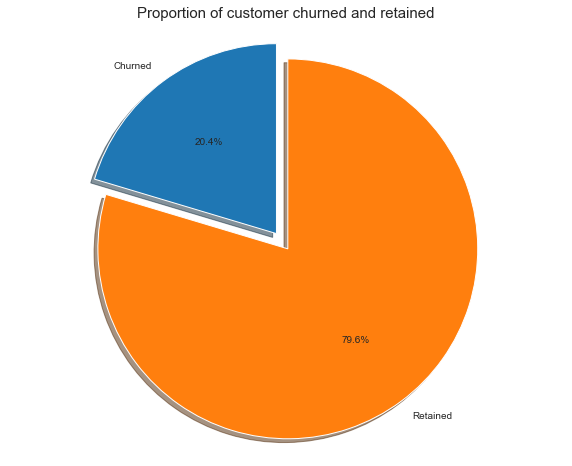

In [7]:
labels = 'Churned', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

Churn breakdown by geography, gender, has credit card or not and is active member or not.

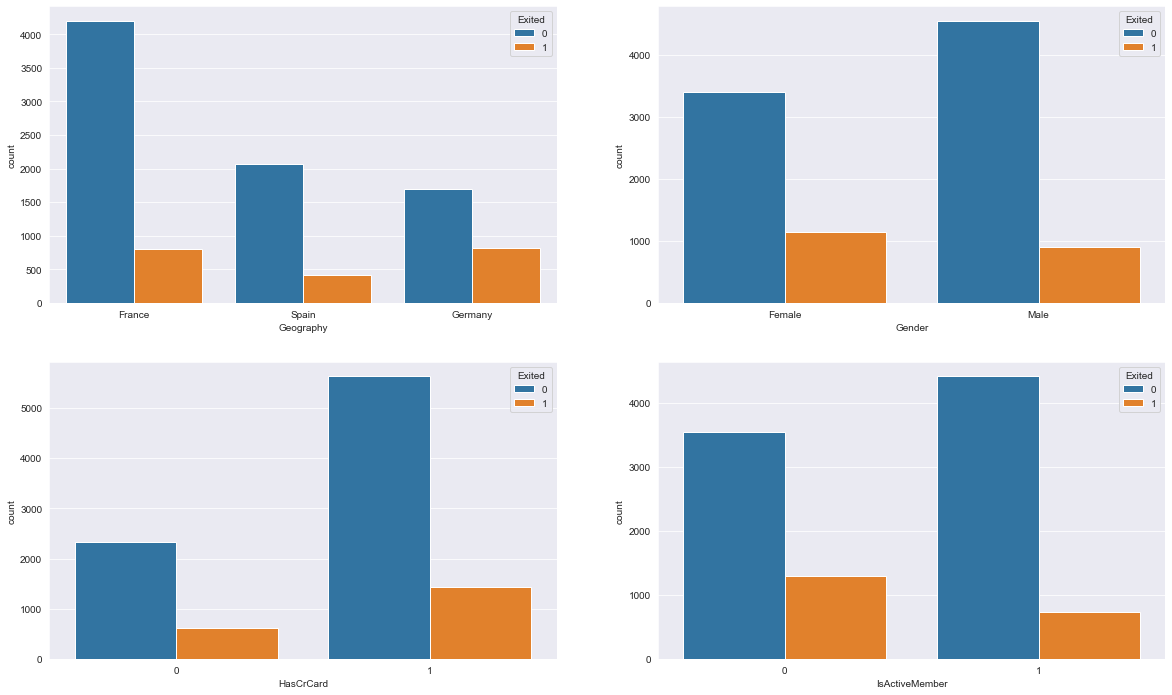

In [8]:
# plotting churn by geography, Gender, Has Credit Card & Is Active Member.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])  
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

Observation - 

  A major portion of the customers are from France so a majority of customers churning are also from France.
  
  The proportion of female customers churning is also greater than that of male customers.
  
  Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards, may prove this to be a coincidence.
  
   Inactive members have a greater churn. The overall proportion of inactive mebers is quite high which suggests that the bank may need a program to turn this group to active customers as this will definately have a positive impact on the overall customer churn.

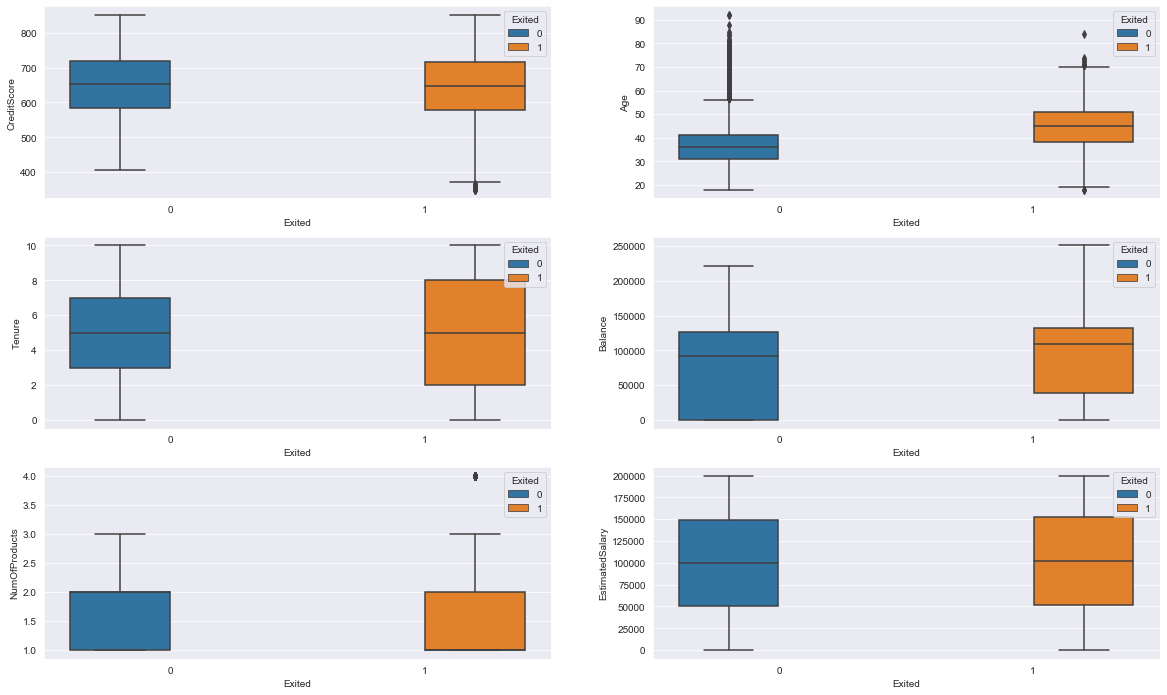

In [9]:
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

    There is no significant difference in the credit score distribution between retained and churned customers.
    
    The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.
    
    With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
    
    Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
    
    Neither the product nor the salary has a significant effect on the likelihood to churn.


# Analysis of  credit score. 

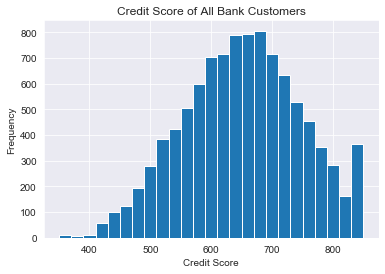

In [10]:
df['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of All Bank Customers').set_xlabel('Credit Score')
plt.show()

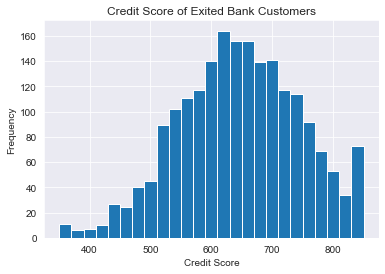

In [11]:
df_exited = df.query('Exited==1')
df_exited['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of Exited Bank Customers').set_xlabel('Credit Score')
plt.show()

When we plot the credit score distribution of customers who exited and did not exit, we can see that customers who exited had a roughly lower average credit score.

When we plot the credit scores ad age in a scatterplot with the points color coded by whether customers exited or not. It can be seen that the majority of the customers who exited were between 40 and 60 years.

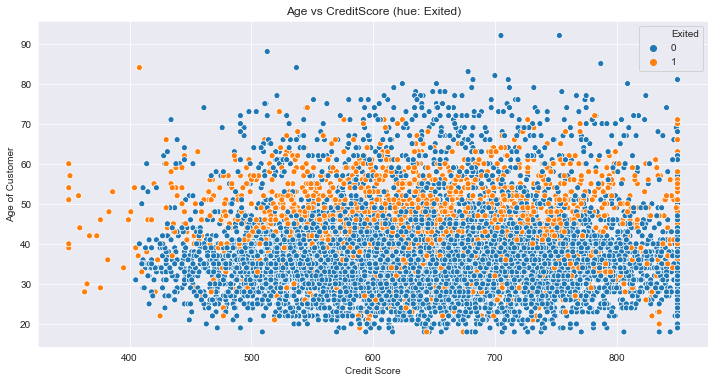

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['CreditScore'],df['Age'], hue=df['Exited'])
plt.title('Age vs CreditScore (hue: Exited)')
plt.xlabel('Credit Score')
plt.ylabel('Age of Customer')
plt.show()


In [13]:
cust_exit = df[df['Exited'] == 1]
mean_all_cust  =   df['CreditScore'].mean()
mean_cs_exit = cust_exit['CreditScore'].mean()

print('The mean credit score of all bank customers is ' + str(mean_all_cust))
print('The mean credit score of bank customers who exited is ' + str(mean_cs_exit))

The mean credit score of all bank customers is 650.5288
The mean credit score of bank customers who exited is 645.3514972999509


 Converted categorical variables Geography and Gender to binary.

In [14]:
Geography1 = pd.get_dummies(df.Geography).iloc[:,1:]
df = pd.concat([df,Geography1], axis=1)
Gender1 = pd.get_dummies(df.Gender).iloc[:,0:]
df = pd.concat([df,Gender1], axis=1)
df = df.drop(['Gender','Geography'],axis=1)

Dropped columns customerid and surname that are not required for the analysis.

In [15]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

This is what the dataset looks like now.

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


Now that our dataset is ready, we can train our machine learning model. And for that, we need to isolate the variable that we are trying to predict. X contains all variables apart from Exited while Y contains only the Exited variable.

In [17]:
X =  df.drop(['Exited'], axis=1)
y = df['Exited']

Now we will use sklearn module to break the data set to the test set at 20% of the dataset and the remaining to training set.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We are using the Random Forest Classifier Algoritm. And we will use algorithm training to make predictions on new data.

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.77      0.52      0.62       405

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.8705


This indicate an accuracy of 87.05%, which means that our algorithm successfully predicts churn 87.05% of the time.

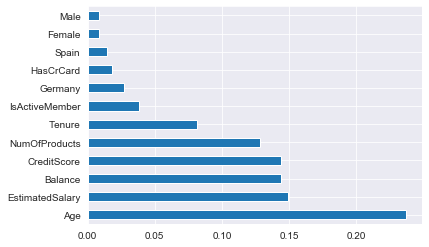

In [24]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')

Based on this data, we can see that Age has the highest impact on the churn, followed by Estimated Salary,Balance, Credit Score, Number of Products amd Tenure.

We can see that using the model we can predict churn with an accuracy of 87%. We can use this information to identify customers who may be prone to exiting the bank and reach out to them with incentives to retain.